## Carga de datos procesados

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import shapiro
 
# mis cosas
import sys
import os

# Añado el directorio padre (del que está este notebook) a sys.path
sys.path.append(os.path.abspath('../'))
from scripts.utils_agv import ini_inspec, crear_tabla_resumen, numericas, categoricas

#from Prof.utils import create_summary_table, descriptive_statistics, plot_variable_distribution, grafico_combinaciones

In [3]:
viviendas_Madrid = pd.read_csv('../data/processed/viviendas_EDA_agv.csv', index_col = 'id')
df = viviendas_Madrid.copy()

In [4]:
print("Tipos de datos antes de la conversión:")
print(df.dtypes)

# Convertir columnas de tipo object a string
df["url"] = df["url"].astype("string")
df["title"] = df["title"].astype("string")
df["description"] = df["description"].astype("string")
df["Distrito"] = df["Distrito"].astype("string")
df["Barrio"] = df["Barrio"].astype("string")
df["type"] = df["type"].astype("string")
df["adName"] = df["adName"].astype("string")

# Convertir columnas a int16
df["baths"] = df["baths"].astype("int16")
df["rooms"] = df["rooms"].astype("int16")
df["m2"] = df["m2"].astype("int16")


print("\nTipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos antes de la conversión:
url             object
title           object
euros_m2       float64
price            int64
baths            int64
rooms            int64
m2               int64
description     object
type            object
Barrio          object
Distrito        object
adName          object
dtype: object

Tipos de datos después de la conversión:
url            string[python]
title          string[python]
euros_m2              float64
price                   int64
baths                   int16
rooms                   int16
m2                      int16
description    string[python]
type           string[python]
Barrio         string[python]
Distrito       string[python]
adName         string[python]
dtype: object


In [5]:
df

,url,title,euros_m2,price,baths,rooms,m2,description,type,Barrio,Distrito,adName
id,,,,,,,,,,,,
104027174,https://www.idealista.com/inmueble/104027174/,Piso en venta en calle de Villanueva,10491.80,1920000,3,3,183,Residencia única con acabados de la más alta c...,Pisos,Recoletos,Salamanca,Promora Madrid
102321942,https://www.idealista.com/inmueble/102321942/,Piso en venta en calle de Núñez de Balboa,11735.29,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...",Pisos,Castellana,Salamanca,Engel & Völkers Madrid
103334142,https://www.idealista.com/inmueble/103334142/,Piso en venta en Conde Orgaz-Piovera,4814.81,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,Pisos,ND,Hortaleza,De Salas Consultores Inmobiliarios
104161987,https://www.idealista.com/inmueble/104161987/,Piso en venta en Nueva España,6653.23,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,Pisos,ND,Chamartín,Gilmar Viso - Chamartín
103989666,https://www.idealista.com/inmueble/103989666/,Piso en venta en calle de Claudio Coello,13713.36,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,Pisos,Recoletos,Salamanca,Walter Haus Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...
103960809,https://www.idealista.com/inmueble/103960809/,Piso en venta en calle de San Germán,3922.87,1475000,4,5,376,Exclusiva vivienda en San GermánEngel & Völker...,Pisos,Castillejos,Tetuán,Engel & Völkers Madrid
103494183,https://www.idealista.com/inmueble/103494183/,Piso en venta en calle de Fuencarral,6811.02,865000,2,2,127,"Esta magnífica vivienda, situada en una emblem...",Pisos,Trafalgar,Chamberí,Walter Haus Madrid
102107584,https://www.idealista.com/inmueble/102107584/,Piso en venta en Castellana,16701.90,7900000,5,4,473,"Álvora Capital Properties, consultora inmobili...",Pisos,ND,Salamanca,álvora capital properties


## Análisis Exploratorio de Datos (EDA)

### Análisis univariante

In [6]:
crear_tabla_resumen (df)

,Tipo de dato,Categoría,Cardinalidad,% Cardinalidad,Valores faltantes,% Valores faltantes
Columna,,,,,,
url,string[python],Categórica Nominal,915,100.000000,0,0.0
title,string[python],Categórica Nominal,551,60.218579,0,0.0
euros_m2,float64,Numérica Continua,777,84.918033,0,0.0
price,int64,Numérica Discreta,393,42.950820,0,0.0
baths,int16,Numérica Discreta,12,1.311475,0,0.0
rooms,int16,Numérica Discreta,13,1.420765,0,0.0
m2,int16,Numérica Discreta,351,38.360656,0,0.0
description,string[python],Categórica Nominal,908,99.234973,0,0.0
type,string[python],Binaria,2,0.218579,0,0.0


El DataFrame consta de 11 columnas, 7 de ellas eran object, ahora cadena de texto, y las otras cuatro, numerica continua. Precio y metros cuadrados podrían ser numericas continuas, pero el redondeo presentado las deja en numerica discretas. 
Sorprende la baja cardinalidad de la columna tipología, la cual solo tien dos valores; esta condicion de binaria me permitirá confrontar diferencias entre ambas.
No tengo valores faltates, con lo que no será necesario hacer imputación alguna. 

In [7]:
numericas (df)

,count,mean,median,mode,std,min,25%,50%,75%,max,iqr,range,variance,std_dev,skewness,kurtosis,missing,missing_percent
columna,,,,,,,,,,,,,,,,,,
euros_m2,915,6.400946e+03,5760.87,6250.0,2.800262e+03,1198.08,4394.45,5760.87,7937.335,21299.64,3542.885,20101.56,7.841466e+06,2.800262e+03,1.093339,1.660759,0,0.0
price,915,1.290575e+06,990000.00,850000.0,1.036640e+06,122000.00,625000.00,990000.00,1650000.000,8900000.00,1025000.000,8778000.00,1.074623e+12,1.036640e+06,2.303451,8.600689,0,0.0
baths,915,2.900546e+00,3.00,2.0,1.626487e+00,1.00,2.00,3.00,4.000,12.00,2.000,11.00,2.645459e+00,1.626487e+00,1.408534,3.062178,0,0.0
rooms,915,3.474317e+00,3.00,3.0,1.594625e+00,0.00,2.00,3.00,4.000,12.00,2.000,12.00,2.542830e+00,1.594625e+00,0.885662,1.917274,0,0.0
m2,915,2.172383e+02,158.00,133.0,1.917458e+02,14.00,104.00,158.00,264.000,1768.00,160.000,1754.00,3.676646e+04,1.917458e+02,3.364024,17.330217,0,0.0


In [8]:
categoricas (df)

,count,unique,top,freq,missing,missing_percent
columna,,,,,,
url,915,915,https://www.idealista.com/inmueble/100001075/,1,0,0.0
title,915,551,Piso en venta en Castellana,17,0,0.0
description,915,908,VISITA NUESTRO PISO PILOTO – ÚLTIMAS UNIDADES ...,3,0,0.0
type,915,2,Pisos,779,0,0.0
Barrio,915,87,ND,408,0,0.0
Distrito,915,21,Salamanca,162,0,0.0
adName,915,118,Engel & Völkers Madrid,134,0,0.0


De acuerdo con la guia proporcionada, vamos a realizar unos graficos para mostrar más claramente algunas conclusiones. 

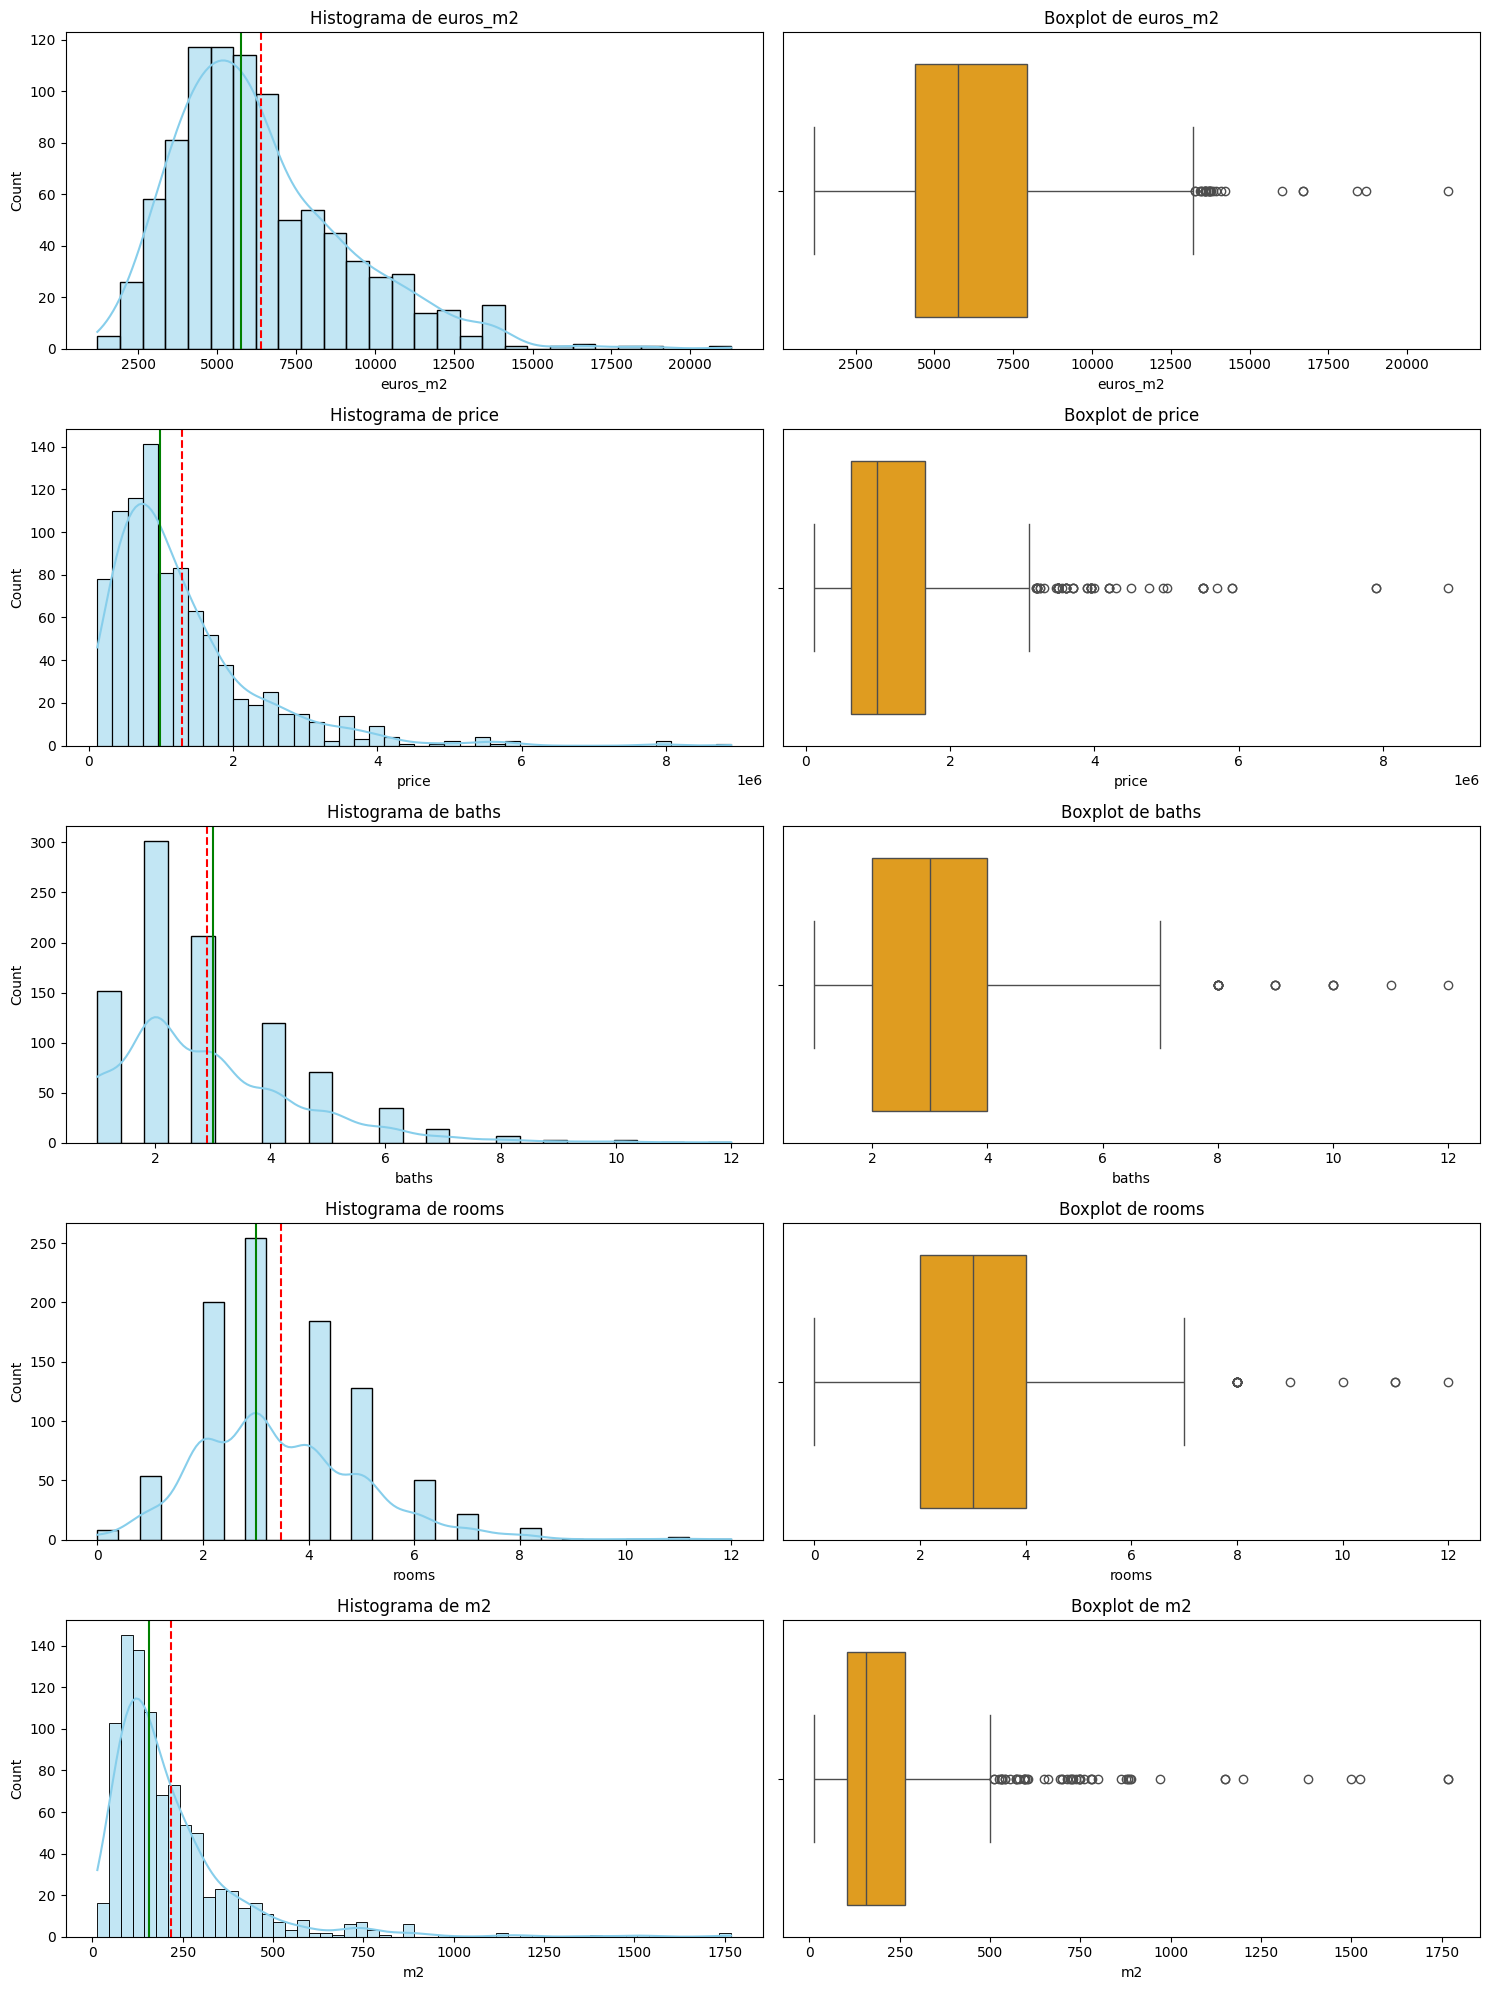

In [9]:
# Configuración general de la figura
plt.figure(figsize=(15, 20))  # Tamaño de la figura

# Seleccionar columnas numéricas
numerical_columns = df.select_dtypes(include='number').columns  

# Crear gráficos
for i, feature in enumerate(numerical_columns):
    # Histograma (izquierda)
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)  # Gráfico en columna izquierda
    sns.histplot(data=df, x=feature, kde=True, color='skyblue')
    plt.title(f'Histograma de {feature}')

    # Añadir líneas de la media y la mediana
    mean_value = df[feature].mean()
    median_value = df[feature].median()
    
    # Línea de la media
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Media: {mean_value:.2f}')
    
    # Línea de la mediana
    plt.axvline(median_value, color='green', linestyle='-', label=f'Mediana: {median_value:.2f}')


    # Boxplot girado (derecha)
    plt.subplot(len(numerical_columns), 2, 2 * i + 2)  # Gráfico en columna derecha
    sns.boxplot(data=df, x=feature, color='orange', orient='h')  # Boxplot horizontal
    plt.title(f'Boxplot de {feature}')

# Ajustar diseño
plt.tight_layout()


# Guardar gráfico en un archivo de imagen (puede ser PNG, JPG, etc.)
plt.savefig('graf/graficos_numericos_uni.png', dpi=150)  # Ajusta 'dpi' para cambiar la resolución de la imagen

plt.show()



Podemos observar, fruto de los gráficos anteriores:
-	euros_m2, distribución más o menos normal, con una ligeria asimetría positiva con todos los outliers en su derecha, hacia valores euros_m2 altos
-	Precio, lo mismo, pero la distribución es leptocúrtica y la asimetría es mayor.
-	El número de baños y habitaciones es similar en su configuración, mesocúrtica (normal), y con asimetría positiva
-	La columna m2 tiene distribución leptocúrtica, con clara asimetría positiva


Podriamos plantearnos si la distribución de precio_m2 o bien la de habitaciones es normal, para lo cual vamos aplicar alguna prueba matemática. 

In [10]:
# Filtra la columna de numero de habitaciones
print("Prueba de normalidad para número de habitaciones")
data = df['rooms'].dropna()

# Realiza la prueba de normalidad de Shapiro-Wilk
stat, p_val = shapiro(data)

# Resultados
print(f"Estadístico de Shapiro-Wilk: {stat}")
print(f"Valor p: {p_val}")

# Si p < 0.05, la variable no sigue una distribución normal
if p_val < 0.05:
    print("Los datos no siguen una distribución normal")
else:
    print("Los datos siguen una distribución normal")


Prueba de normalidad para número de habitaciones
Estadístico de Shapiro-Wilk: 0.9278275538881126
Valor p: 1.4683368086000003e-20
Los datos no siguen una distribución normal


In [11]:
# Filtra la columna de preio m2
print("Prueba de normalidad para precio por m2")
data = df['euros_m2'].dropna()

# Realiza la prueba de normalidad de Shapiro-Wilk
stat, p_val = shapiro(data)

# Resultados
print(f"Estadístico de Shapiro-Wilk: {stat}")
print(f"Valor p: {p_val}")

# Si p < 0.05, la variable no sigue una distribución normal
if p_val < 0.05:
    print("Los datos no siguen una distribución normal")
else:
    print("Los datos siguen una distribución normal")


Prueba de normalidad para precio por m2
Estadístico de Shapiro-Wilk: 0.93413398716626
Valor p: 1.1743237276942955e-19
Los datos no siguen una distribución normal


Para demostrar graficamente la no-normalidad, procedo a realizar un grafico Quantil-Quantile, que debería no aproximarse a la recta que indicaría la normalidad de los datos.

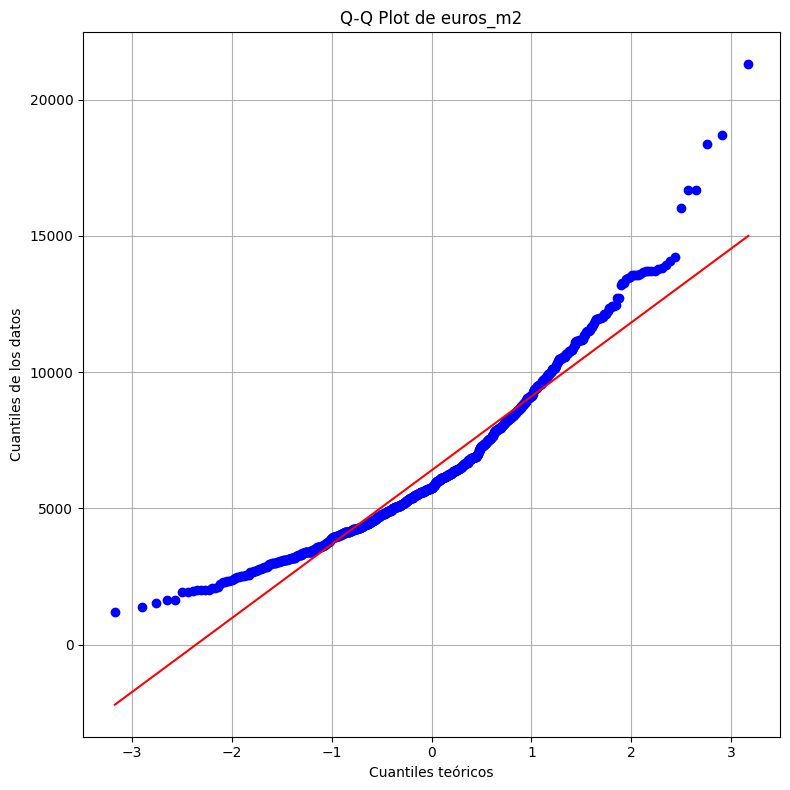

In [12]:
# Variable a analizar
variable = df['euros_m2']

# Crear el Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(variable, dist="norm", plot=plt)

# Personalizar el gráfico
plt.title('Q-Q Plot de euros_m2')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()

# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/q_q_plot_m2.png', dpi=150) 

plt.show()


Ya comprobamos que tenemos solamente dos tipos de propiedades, podemos ver la distribución de dichas dos tipologías 

In [13]:
df.head(2)


,url,title,euros_m2,price,baths,rooms,m2,description,type,Barrio,Distrito,adName
id,,,,,,,,,,,,
104027174,https://www.idealista.com/inmueble/104027174/,Piso en venta en calle de Villanueva,10491.80,1920000,3,3,183,Residencia única con acabados de la más alta c...,Pisos,Recoletos,Salamanca,Promora Madrid
102321942,https://www.idealista.com/inmueble/102321942/,Piso en venta en calle de Núñez de Balboa,11735.29,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...",Pisos,Castellana,Salamanca,Engel & Völkers Madrid


In [14]:
# Crear un nuevo dataframe solo con las columnas necesarias
df_type = df[['type']]

# Contar las apariciones de cada tipo
df_count = df_type['type'].value_counts().reset_index()

# Renombrar las columnas
df_count.columns = ['type', 'count']

# Filtrar solo los tipos 'Pisos' e 'Independientes'
df_count = df_count[df_count['type'].isin(['Pisos', 'Independientes'])]

df_count


,type,count
0,Pisos,779
1,Independientes,136


In [15]:
df[df['type']== 'Independientes']

,url,title,euros_m2,price,baths,rooms,m2,description,type,Barrio,Distrito,adName
id,,,,,,,,,,,,
101582665,https://www.idealista.com/inmueble/101582665/,Chalet adosado en venta en paseo de los Jacintos,6218.75,995000,3,3,160,Chalet adosado luminoso en HispanámericaEngel ...,Independientes,Hispanoamérica,Chamartín,Engel & Völkers Madrid
104103711,https://www.idealista.com/inmueble/104103711/,Casa o chalet independiente en venta en calle ...,5586.91,4950000,7,6,886,PROMORA MADRID vende magnífico chalet independ...,Independientes,Nueva España,Chamartín,Promora Madrid
104149846,https://www.idealista.com/inmueble/104149846/,Chalet pareado en venta en calle de el Algabeño,4495.91,1650000,5,5,367,Suma inmobiliaria ubicada en la prestigiosa ur...,Independientes,Piovera,Hortaleza,SUMA Inmobiliaria
104079750,https://www.idealista.com/inmueble/104079750/,Chalet pareado en venta en Canillas,4223.74,1850000,5,5,438,"Suma inmobiliaria ofrece, EN EXCLUSIVA, este c...",Independientes,ND,Hortaleza,SUMA Inmobiliaria
93496901,https://www.idealista.com/inmueble/93496901/,Chalet adosado en venta en calle del Marqués d...,2550.52,1237000,7,8,485,"Espléndido chalet de lujo en Peñagrande, con 4...",Independientes,Peñagrande,Fuencarral - El Pardo,De Salas Mirasierra - Puerta de Hierro
...,...,...,...,...,...,...,...,...,...,...,...,...
103710062,https://www.idealista.com/inmueble/103710062/,Chalet pareado en venta en Palomas,6167.66,2060000,5,5,334,QUARTIERS Expertos Inmobiliarios. Agents Immob...,Independientes,ND,Hortaleza,Quartiers Expertos Inmobiliarios. Conde Orgaz/...
102616450,https://www.idealista.com/inmueble/102616450/,Chalet adosado en venta en calle José Rizal s/n,4583.33,1650000,5,5,360,QUALITÉ Agence Immobilière Française présente ...,Independientes,Piovera,Hortaleza,QUALITÉ Agence Immobilière
101569483,https://www.idealista.com/inmueble/101569483/,Casa o chalet independiente en venta en Apósto...,2500.00,1050000,6,6,420,Chalet doble en Colonia el BosqueEngel & Völke...,Independientes,ND,Hortaleza,Engel & Völkers Madrid


/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_13649/3696666049.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=4, fontsize=12)


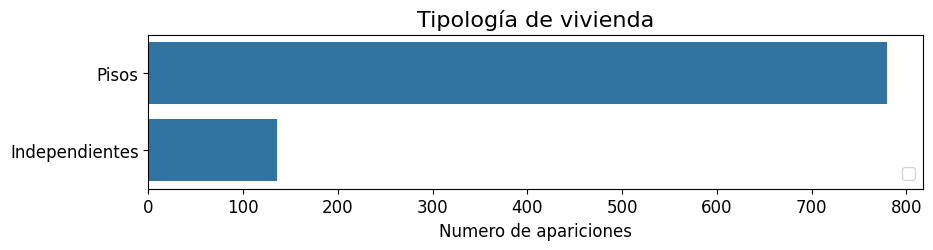

In [16]:
# Crear gráfico apilado, barras horizontales
plt.figure(figsize=(10, 2))
sns.barplot(data=df_count, x='count', y='type', dodge = False)

# Personalización del gráfico
plt.title('Tipología de vivienda', fontsize=16)
plt.xlabel('Numero de apariciones', fontsize=12)
plt.ylabel("")
plt.legend(loc=4, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/tipos_barras.png', dpi=150) 

# Mostrar el gráfico
plt.show()

Vemos que la mayouría de las propiedades son pisos, y solo 136 son independientes, esto es, viviendas unifamiliares.

Vamoa a realizar graficos de densidad  para cada variable numérica. Vemos distribuciones que cuadran con los histogramas anteriores.

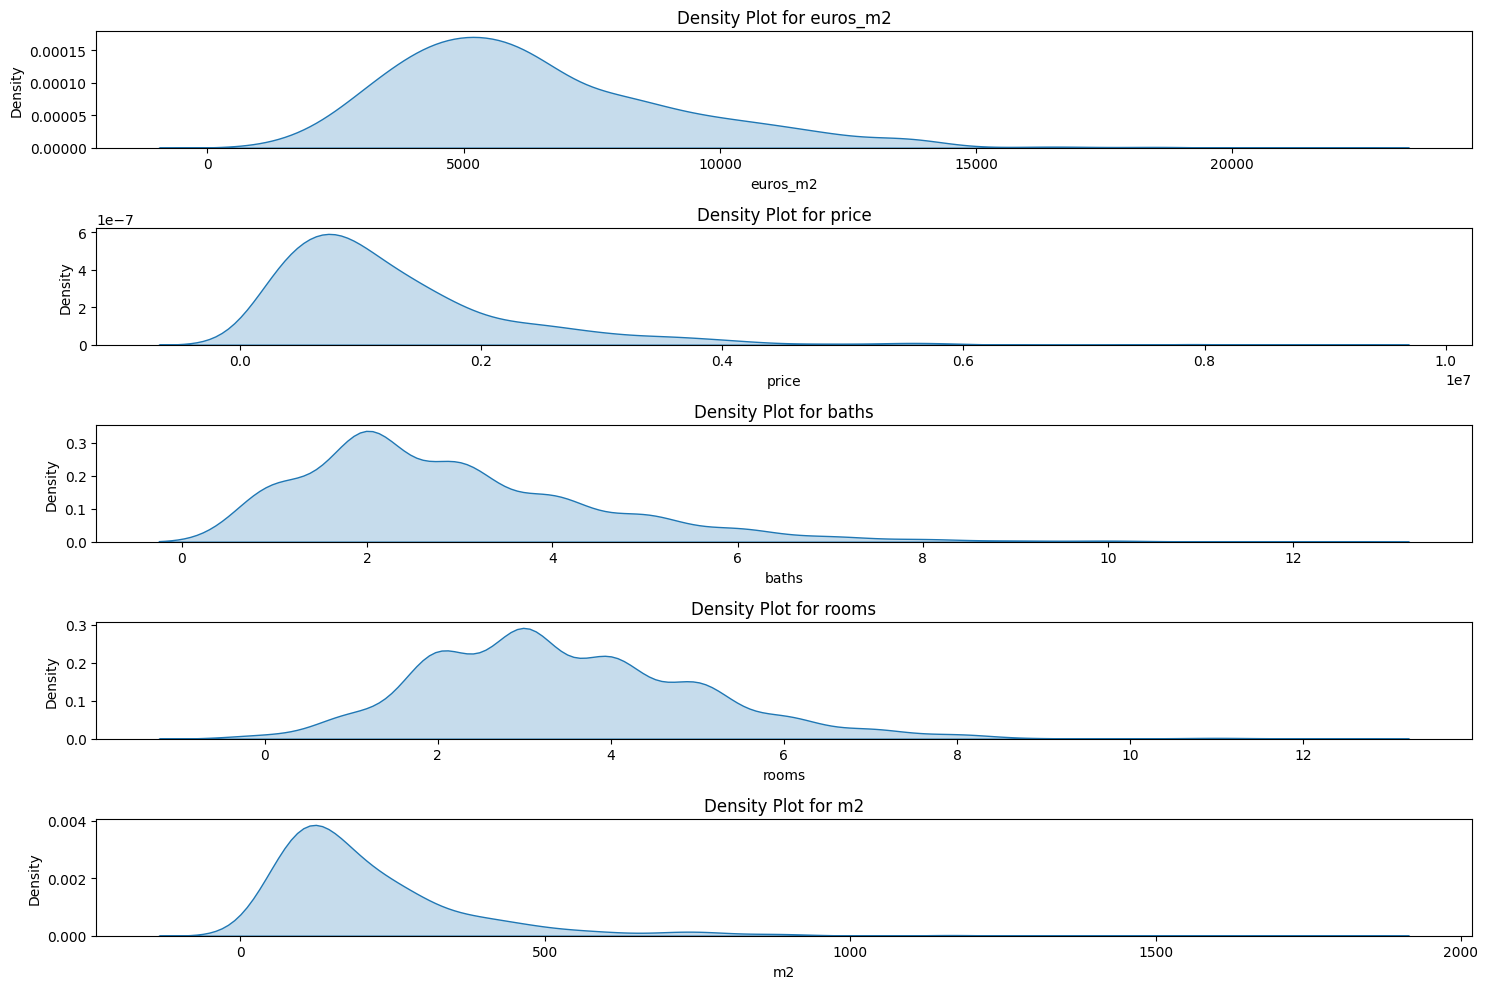

In [17]:
# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['number'])

# Configurar el tamaño de los subgráficos
plt.figure(figsize=(15, 10))

# Crear un gráfico de densidad para cada columna numérica
for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(len(numeric_cols.columns), 1, i)  # Crear subgráficos
    sns.kdeplot(data=numeric_cols[column], fill= True)
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')


# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/numericas_densidad.png', dpi=150) 

plt.tight_layout()
plt.show()


Con las variables categóricas que considero interesantes, vemos sus freciencias absolutas y realativas


In [18]:
# Lista de columnas categóricas
categorical_cols = ['Barrio', 'Distrito', 'adName']

# Crear un diccionario para almacenar resultados
frequencies = {}

for col in categorical_cols:
    # Frecuencia absoluta
    absolute_freq = df[col].value_counts()
    # Frecuencia relativa
    relative_freq = df[col].value_counts(normalize=True)
    # Combinar ambas en un DataFrame
    freq_df = pd.DataFrame({
        'Absolute Frequency': absolute_freq,
        'Relative Frequency (%)': relative_freq * 100
    })
    frequencies[col] = freq_df

# Mostrar resultados para cada columna
for col, freq_df in frequencies.items():
    print(f"\nFrequency table for {col}:\n")
    print(freq_df)



Frequency table for Barrio:

                   Absolute Frequency  Relative Frequency (%)
Barrio                                                       
ND                                408               44.590164
Universidad                        25                 2.73224
Goya                               22                2.404372
Lista                              22                2.404372
Recoletos                          20                2.185792
...                               ...                     ...
Delicias                            1                 0.10929
Buenavista                          1                 0.10929
El Plantío                          1                 0.10929
Canillejas                          1                 0.10929
San Juan Bautista                   1                 0.10929

[87 rows x 2 columns]

Frequency table for Distrito:

                       Absolute Frequency  Relative Frequency (%)
Distrito                                   

Para el anunciante, me parece interesante mostrar como se reparten el mercado mediante un gráfico de tarta. 

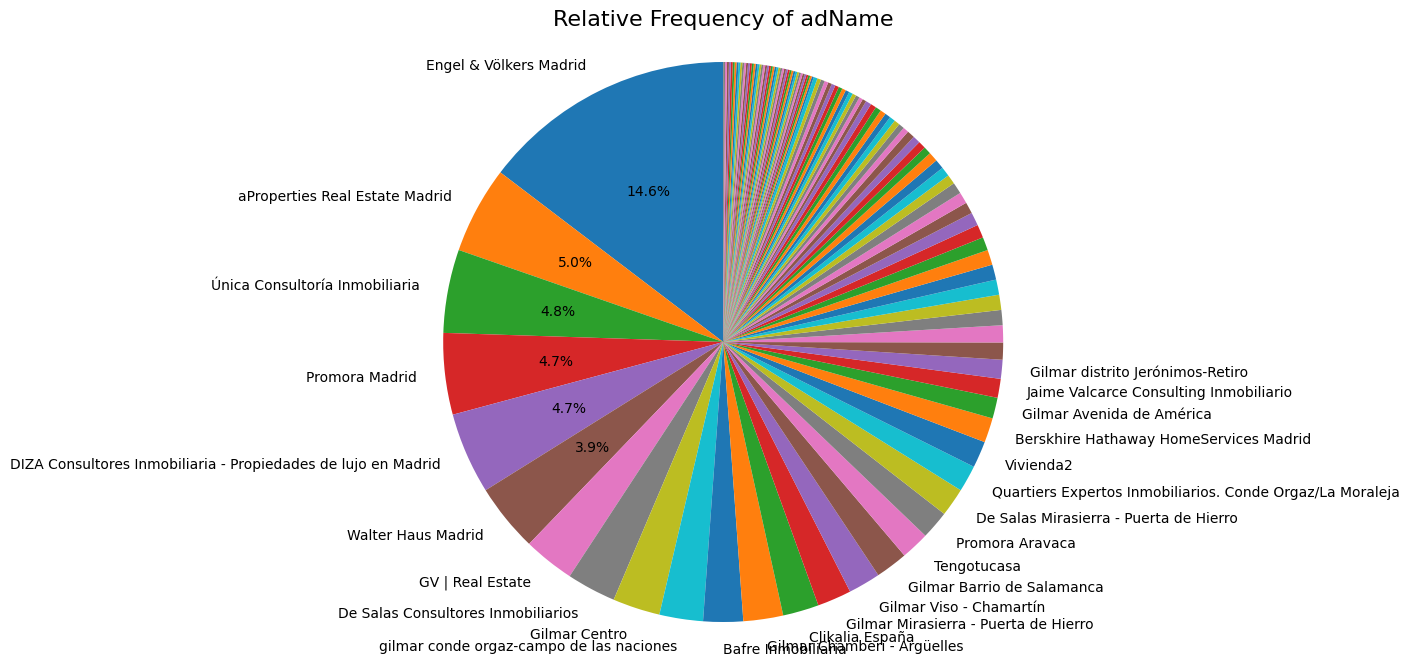

In [19]:
#Calcular frecuencias relativas de 'adName'
relative_freq_adName = df['adName'].value_counts(normalize=True) * 100

# Función personalizada para ocultar valores menores a 2.5%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

# Crear etiquetas personalizadas para los nombres
labels = [name if pct >= 1 else '' for name, pct in zip(relative_freq_adName.index, relative_freq_adName)]


# Crear gráfico de tarta
plt.figure(figsize=(10, 8))
plt.pie(relative_freq_adName, labels=labels, autopct=autopct_format, 
        startangle=90, colors=sns.color_palette('tab10'), textprops={'fontsize': 10})
plt.title('Frecuencia relativa del anunciante', fontsize=16)
plt.axis('equal')  # Asegurar que el gráfico es un círculo


# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/anunciante_tarta.png', dpi=150) 

plt.show()

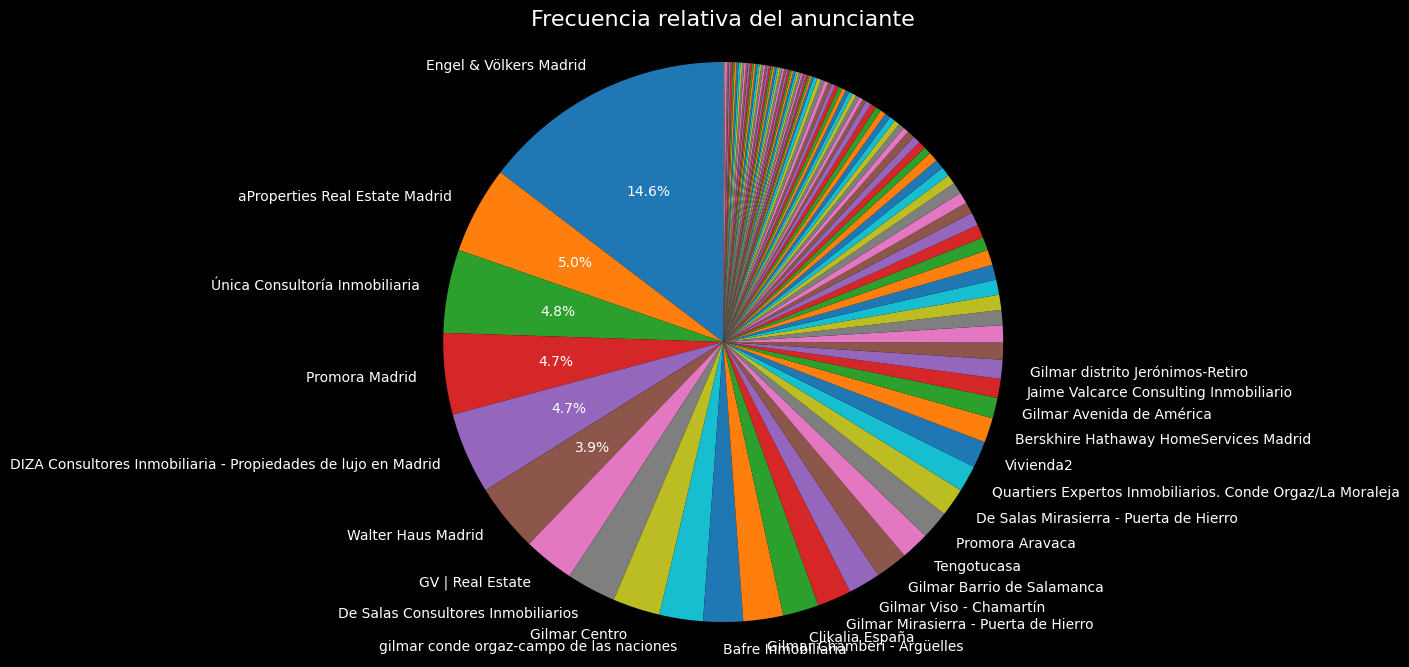

In [95]:
# Calcular frecuencias relativas de 'adName'
relative_freq_adName = df['adName'].value_counts(normalize=True) * 100

# Función personalizada para ocultar valores menores a 2.5%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

# Crear etiquetas personalizadas para los nombres
labels = [name if pct >= 1 else '' for name, pct in zip(relative_freq_adName.index, relative_freq_adName)]

# Configurar el estilo de fondo negro
plt.style.use('dark_background')

# Crear gráfico de tarta
plt.figure(figsize=(10, 8))
plt.pie(relative_freq_adName, labels=labels, autopct=autopct_format, 
        startangle=90, colors=sns.color_palette('tab10'), 
        textprops={'fontsize': 10, 'color': 'white'})  # Etiquetas en blanco
plt.title('Frecuencia relativa del anunciante', fontsize=16, color='white')  # Título en blanco
plt.axis('equal')  # Asegurar que el gráfico es un círculo

# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/anunciante_tarta_n.png', dpi=150)

plt.show()


In [21]:
# Asegurar el estilo predeterminado
plt.style.use('default')



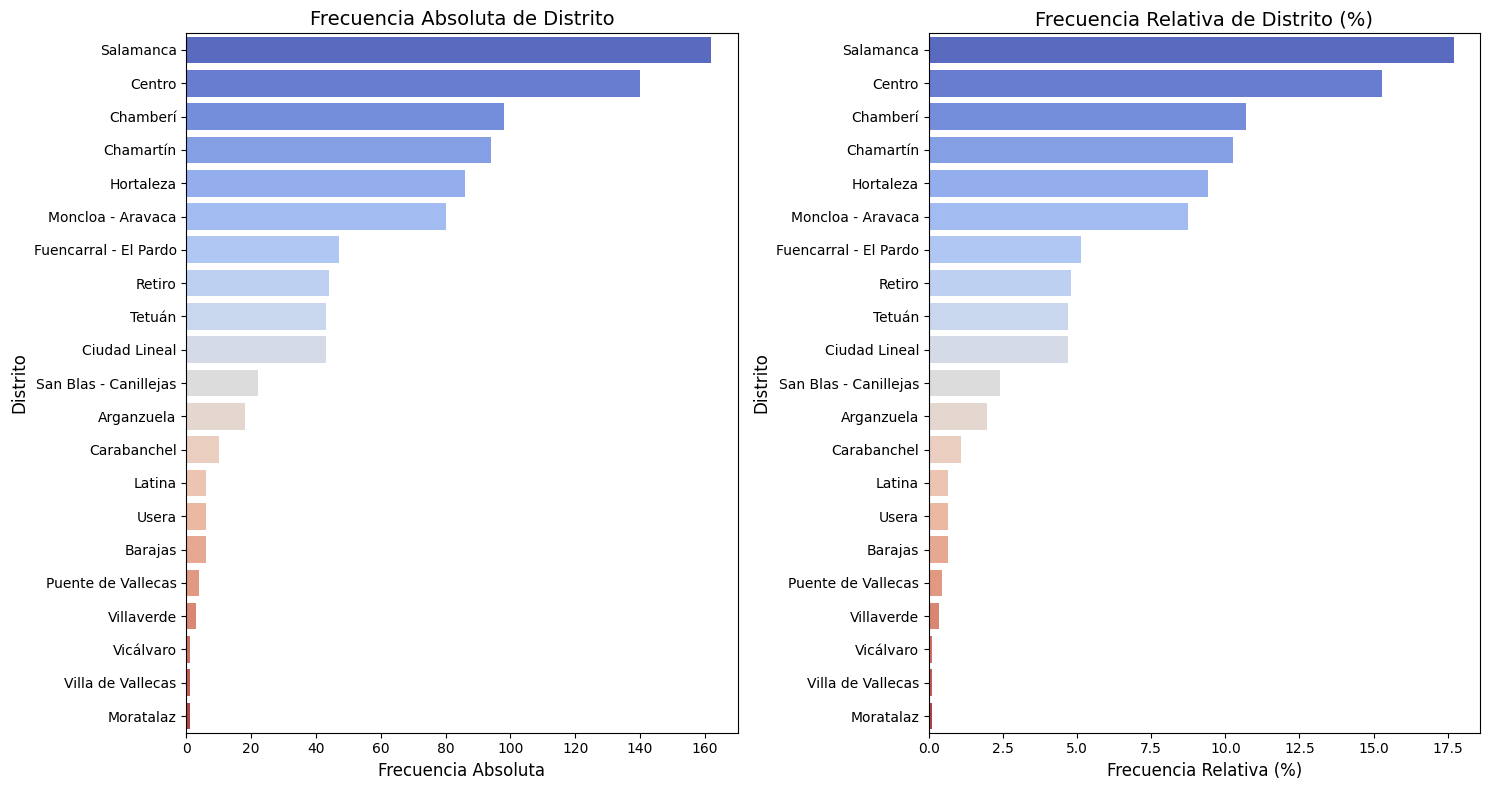

In [31]:

# Calcular frecuencias absolutas y relativas
freq_abs_distrito = df['Distrito'].value_counts()
freq_rel_distrito = df['Distrito'].value_counts(normalize=True) * 100

# Crear subplots para visualizar las frecuencias
fig, axes = plt.subplots(1,2, figsize=(15, 8))


# Gráfico de barras para frecuencia absoluta de Distrito
sns.barplot(
    x=freq_abs_distrito.values,
    y=freq_abs_distrito.index,
    ax=axes[0],
    hue=freq_abs_distrito.index,  # Asignando la variable de y al hue
    palette="coolwarm",
    legend=False  # Desactivar la leyenda
)
axes[00].set_title("Frecuencia Absoluta de Distrito", fontsize=14)
axes[00].set_xlabel("Frecuencia Absoluta", fontsize=12)
axes[00].set_ylabel("Distrito", fontsize=12)

# Gráfico de barras para frecuencia relativa de Distrito
sns.barplot(
    x=freq_rel_distrito.values,
    y=freq_rel_distrito.index,
    ax=axes[1],
    hue=freq_rel_distrito.index,  # Asignando la variable de y al hue
    palette="coolwarm",
    legend=False  # Desactivar la leyenda
)
axes[1].set_title("Frecuencia Relativa de Distrito (%)", fontsize=14)
axes[1].set_xlabel("Frecuencia Relativa (%)", fontsize=12)
axes[1].set_ylabel("Distrito", fontsize=12)

# Ajustar layout
plt.tight_layout()

# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/distritos_freq.png', dpi=150)

plt.show()



Se observa que la mayoría de los anuncios corresponden a casas en el Distrito de Salamanca y Centro, seguido de Chamberí. Lo cierto es que desconozco el origen o filtrado que pudiera tener en origen este cuadro de datos, pero parecería que es un Dataframe qeu norepresente la realidada de todo Madrid, pues me llama la atención que no haya más viviendas anunciadas en barrios menos caros. 

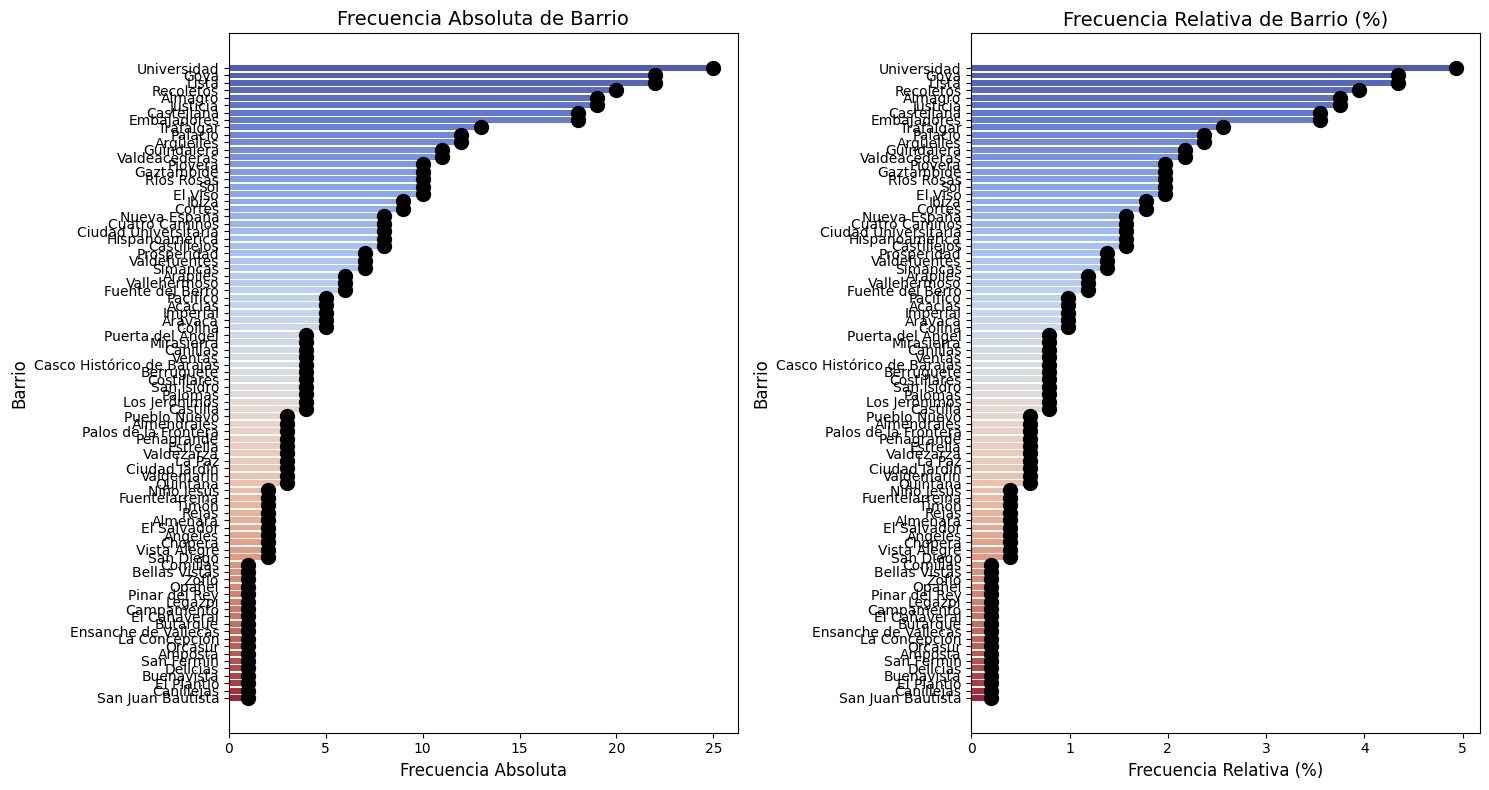

In [32]:
# Filtrar los datos para omitir los valores 'ND' en la columna 'Barrio'
df_filtered_barrio = df[df['Barrio'] != 'ND']

# Calcular frecuencias absolutas y relativas para la columna 'Barrio'
freq_abs_barrio = df_filtered_barrio['Barrio'].value_counts()
freq_rel_barrio = df_filtered_barrio['Barrio'].value_counts(normalize=True) * 100

# Crear subplots para visualizar las frecuencias en una sola fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(15, 8))  # Cambiado a 1 fila y 2 columnas

# Gráfico lollipop para frecuencia absoluta de Barrio
sns.barplot(
    x=freq_abs_barrio.values,
    y=freq_abs_barrio.index,
    ax=axes[0],  # Accediendo a la primera columna
    hue=freq_abs_barrio.index,  # Asignar la variable de y al hue
    palette="coolwarm",
    orient='h',
    legend=False  # Desactivar la leyenda
)
axes[0].scatter(freq_abs_barrio.values, freq_abs_barrio.index, color='black', s=100, label='Frecuencia', zorder=5)  # Puntos en el lollipop
axes[0].set_title("Frecuencia Absoluta de Barrio", fontsize=14)
axes[0].set_xlabel("Frecuencia Absoluta", fontsize=12)
axes[0].set_ylabel("Barrio", fontsize=12)

# Gráfico lollipop para frecuencia relativa de Barrio
sns.barplot(
    x=freq_rel_barrio.values,
    y=freq_rel_barrio.index,
    ax=axes[1],  # Accediendo a la segunda columna
    hue=freq_rel_barrio.index,  # Asignar la variable de y al hue
    palette="coolwarm",
    orient='h',
    legend=False  # Desactivar la leyenda
)
axes[1].scatter(freq_rel_barrio.values, freq_rel_barrio.index, color='black', s=100, label='Frecuencia Relativa', zorder=5)  # Puntos en el lollipop
axes[1].set_title("Frecuencia Relativa de Barrio (%)", fontsize=14)
axes[1].set_xlabel("Frecuencia Relativa (%)", fontsize=12)
axes[1].set_ylabel("Barrio", fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/barrios_freq.png', dpi=150)

plt.show()


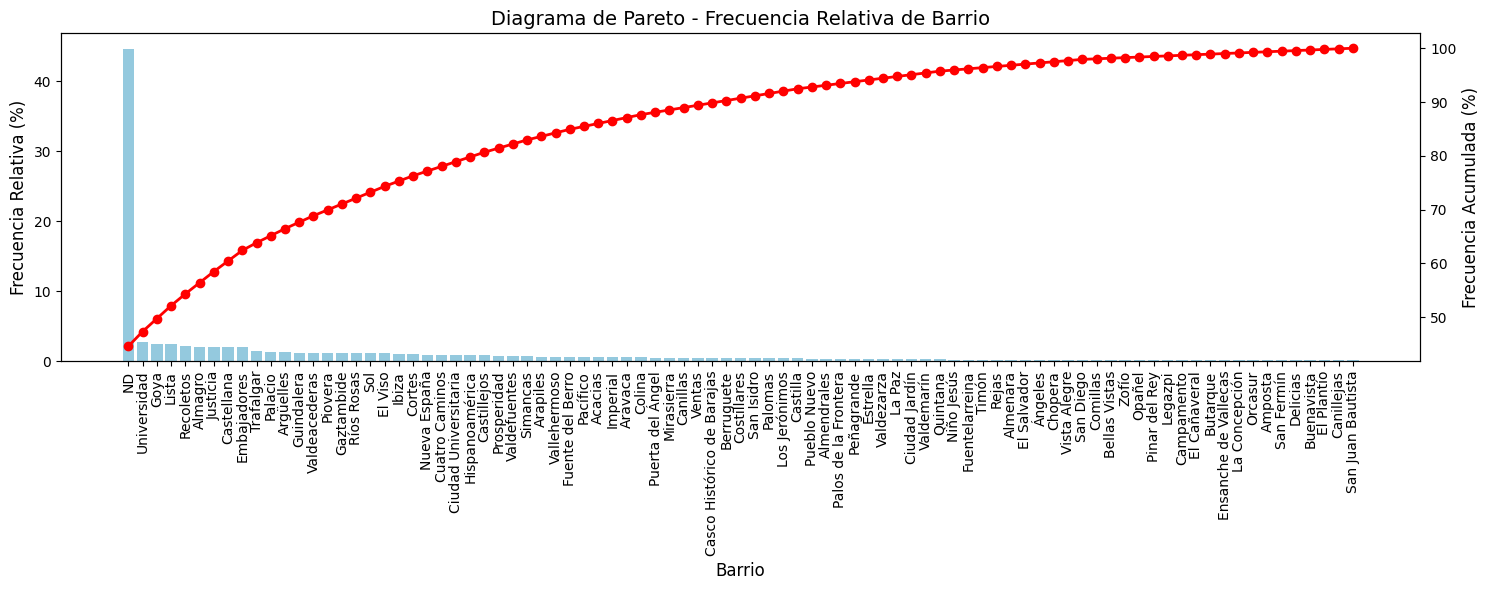

In [30]:
# Crear un DataFrame con las frecuencias relativas sobre el DF completo

freq_rel_barrioCompleto = df['Barrio'].value_counts(normalize=True) * 100

pareto_df = pd.DataFrame({
    'Frecuencia Relativa': freq_rel_barrioCompleto,
    'Frecuencia Acumulada': freq_rel_barrioCompleto.cumsum()
})

# Ordenar el DataFrame por la frecuencia relativa en orden descendente
pareto_df = pareto_df.sort_values(by='Frecuencia Relativa', ascending=False)

# Crear un gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(15, 6))

# Barra de frecuencia relativa
sns.barplot(
    x=pareto_df.index,
    y=pareto_df['Frecuencia Relativa'],
    ax=ax1,
    color='skyblue'
)
ax1.set_xlabel('Barrio', fontsize=12)
ax1.set_ylabel('Frecuencia Relativa (%)', fontsize=12)
ax1.set_title('Diagrama de Pareto - Frecuencia Relativa de Barrio', fontsize=14)
ax1.tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x

# Crear el eje secundario para la línea de frecuencia acumulada
ax2 = ax1.twinx()
ax2.plot(
    pareto_df.index,
    pareto_df['Frecuencia Acumulada'],
    color='red', marker='o', linestyle='-', linewidth=2
)
ax2.set_ylabel('Frecuencia Acumulada (%)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()

# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/barrio_frec_pareto.png', dpi=150) 

plt.show()


En este caso, y mediante un diagrama de barras de Pareto, podemos leer muy bien como tenemos un gran número de inmuebles sin determinar el barrio (áprox un 45%) de forma que el resto de barrios suponen muy poco porcentaje de la muestra que trabajamos

### Análisis bivariado

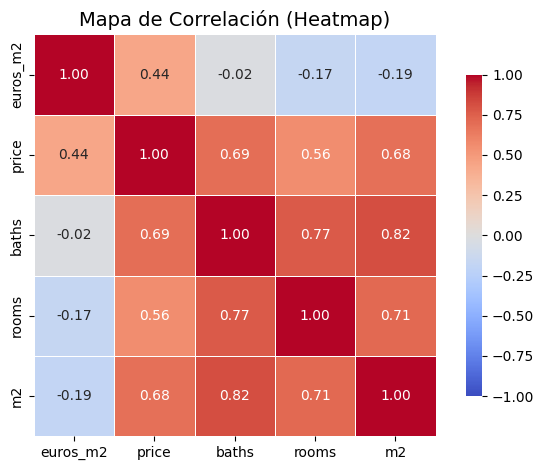

In [34]:
# Seleccionar las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int16']).columns

# Calcular la matriz de correlación
corr_matrix = df[numerical_cols].corr()
#corr_matrix = df[numerical_cols].drop(columns='euros_m2').corr()

sns.heatmap(
    corr_matrix,
    annot=True,  # Añadir los valores de correlación en cada celda
    cmap='coolwarm',  # Paleta de colores
    fmt='.2f',  # Formato de los valores de correlación
    linewidths=0.5,  # Línea entre las celdas
    vmin=-1, vmax=1,  # Rango de los valores de correlación
    cbar_kws={'shrink': 0.8},  # Ajuste de la barra de color
    square=True  # Para que la forma del mapa sea cuadrada
)
plt.title('Mapa de Correlación (Heatmap)', fontsize=14)
plt.tight_layout()

# Guardar gráfico en un archivo de imagen 
plt.savefig('graf/heatmap.png', dpi=150) 

plt.show()

No sorprenden demasiado las realaciones, si bien si es curioso que el numero de baños o de habitaciones tengan más correlación entre sí que con el precio propiamente dicho de la vivienda.

<Figure size 1500x1000 with 0 Axes>

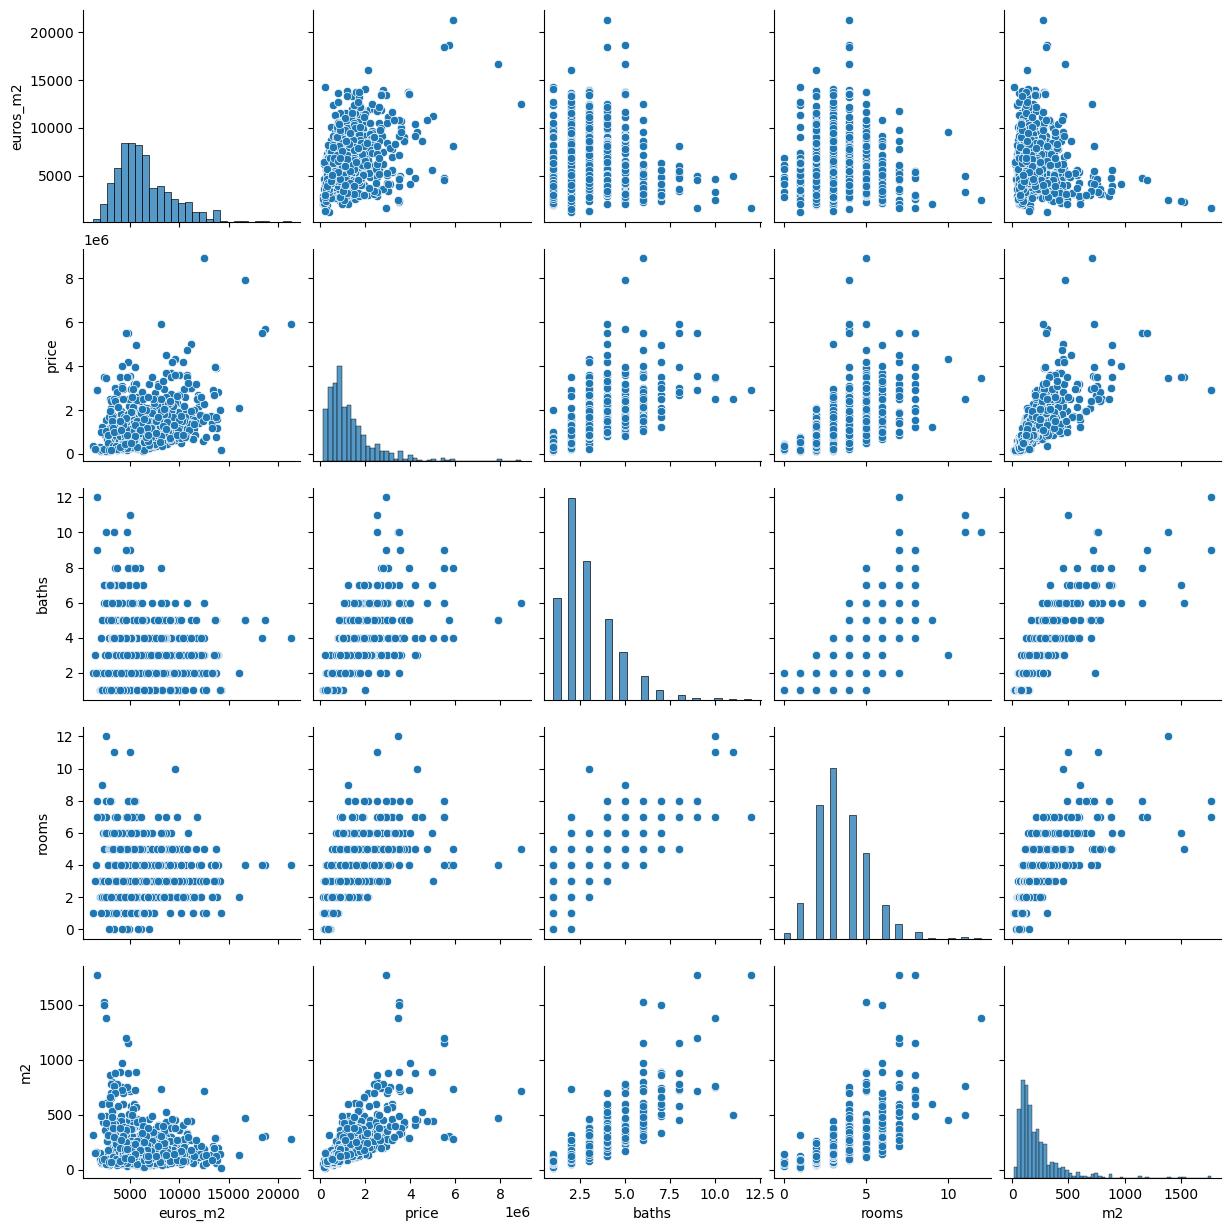

In [33]:
plt.figure(figsize=(15,10))
sns.pairplot(df[numerical_cols], diag_kind='hist')

plt.savefig('graf/numericas_pair_plot.png', dpi=150) 

plt.show();

Algunas observaciones:
-casi todo guarda una proporción directa. Más habitaciones, más baños, más caro el inmueble.

Planteo la hiptostesis ¿creencia? de que a mayor la vivienda, el precio/m2 no crece proporcionalmente, no crece linelamente, sino que es algo más parecido a una curva, que va bajando el precio según la casa sube de tamaño. 

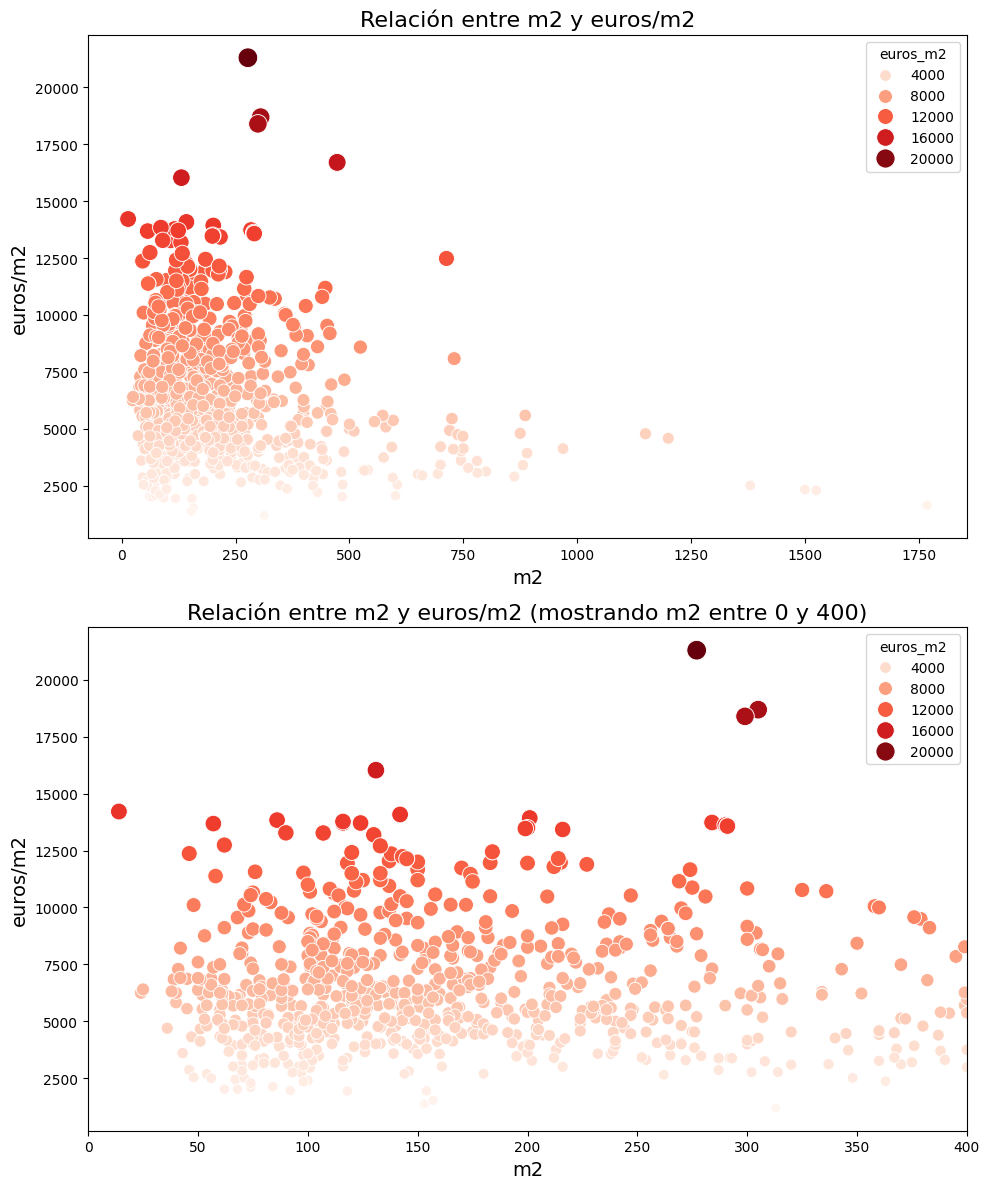

In [35]:
# Crear la figura y los ejes
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Primer gráfico: Mapa de dispersión completo m2 y euros m2
sns.scatterplot(x='m2', y='euros_m2', data=df, hue='euros_m2', palette='Reds', size='euros_m2', sizes=(50, 200), ax=axes[0])
axes[0].set_title("Relación entre m2 y euros/m2", fontsize=16)
axes[0].set_xlabel("m2", fontsize=14)
axes[0].set_ylabel("euros/m2", fontsize=14)

# Segundo gráfico: Mapa de dispersión con solo m2 entre 0 y 400
sns.scatterplot(x='m2', y='euros_m2', data=df, hue='euros_m2', palette='Reds', size='euros_m2', sizes=(50, 200), ax=axes[1])
axes[1].set_title("Relación entre m2 y euros/m2 (mostrando m2 entre 0 y 400)", fontsize=16)
axes[1].set_xlabel("m2", fontsize=14)
axes[1].set_ylabel("euros/m2", fontsize=14)

# Ajustar los límites del gráfico para mostrar solo el rango de m2 entre 0 y 400 en el segundo gráfico
axes[1].set_xlim(0, 400)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

plt.savefig('graf/dispersion_sup_precio.png', dpi=150) 

# Mostrar los gráficos
plt.show()

Sin embargo, compruebo que no es así, sesún estos datos, al menos. Y ese efecto se produce de forma muy poco apreciable o no se produce. Es decir , son otros factores los que determinan, en mayor medida, el precio/m2.

In [36]:
df.head()


,url,title,euros_m2,price,baths,rooms,m2,description,type,Barrio,Distrito,adName
id,,,,,,,,,,,,
104027174,https://www.idealista.com/inmueble/104027174/,Piso en venta en calle de Villanueva,10491.80,1920000,3,3,183,Residencia única con acabados de la más alta c...,Pisos,Recoletos,Salamanca,Promora Madrid
102321942,https://www.idealista.com/inmueble/102321942/,Piso en venta en calle de Núñez de Balboa,11735.29,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...",Pisos,Castellana,Salamanca,Engel & Völkers Madrid
103334142,https://www.idealista.com/inmueble/103334142/,Piso en venta en Conde Orgaz-Piovera,4814.81,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,Pisos,ND,Hortaleza,De Salas Consultores Inmobiliarios
104161987,https://www.idealista.com/inmueble/104161987/,Piso en venta en Nueva España,6653.23,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,Pisos,ND,Chamartín,Gilmar Viso - Chamartín
103989666,https://www.idealista.com/inmueble/103989666/,Piso en venta en calle de Claudio Coello,13713.36,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,Pisos,Recoletos,Salamanca,Walter Haus Madrid


Voy a organizar los precios medios, mediana y moda, por distritos, en orden descendente.

In [54]:
# Agrupar por 'Distrito' y calcular las estadísticas
distritos_precios = (
    df.groupby('Distrito')['price']
    .agg(media=lambda x: round(x.mean(),2), mediana='median', moda=lambda x: x.mode()[0])  # Media, mediana y moda
    .reset_index()  # Restablecer índice para que 'Distrito' sea una columna
)

# Ordenar por el precio medio en orden descendente
distritos_precios = distritos_precios.sort_values(by='media', ascending=False)

# Mostrar el DataFrame resultante
distritos_precios

,Distrito,media,mediana,moda
4,Chamartín,1711365.18,1492500.0,2300000
14,Salamanca,1653689.81,1299500.0,3950000
8,Hortaleza,1617848.84,1519000.0,1650000
10,Moncloa - Aravaca,1605495.00,1200000.0,1450000
5,Chamberí,1497061.22,1087500.0,850000
7,Fuencarral - El Pardo,1281212.77,1050000.0,995000
3,Centro,946661.06,778000.0,859000
13,Retiro,921722.73,755000.0,1125000
16,Tetuán,806453.49,599000.0,388000
6,Ciudad Lineal,729138.14,799000.0,850000


In [75]:
# Agrupar por 'Distrito' y calcular las estadísticas
distritos_precios_m2 = (
    df.groupby('Distrito')['euros_m2']
    .agg(media_m2=lambda x: round(x.mean(),2), mediana_m2='median', moda_m2=lambda x: x.mode()[0])  # Media, mediana y moda
    .reset_index()  # Restablecer índice para que 'Distrito' sea una columna
)

# Ordenar por el precio medio en orden descendente
distritos_precios_m2 = distritos_precios_m2.sort_values(by='media_m2', ascending=False)

# Mostrar el DataFrame resultante
distritos_precios_m2

,Distrito,media_m2,mediana_m2,moda_m2
14,Salamanca,9116.93,9032.840,6462.96
5,Chamberí,7561.11,6871.895,9071.97
3,Centro,7179.19,6729.290,6250.00
4,Chamartín,7045.11,6630.185,5494.30
13,Retiro,6510.09,5765.500,5670.10
16,Tetuán,5472.10,4848.480,4000.00
8,Hortaleza,4881.69,4897.715,4583.33
10,Moncloa - Aravaca,4849.67,4653.525,1640.27
0,Arganzuela,4675.48,4682.385,3389.83
6,Ciudad Lineal,4218.30,4239.630,3378.84


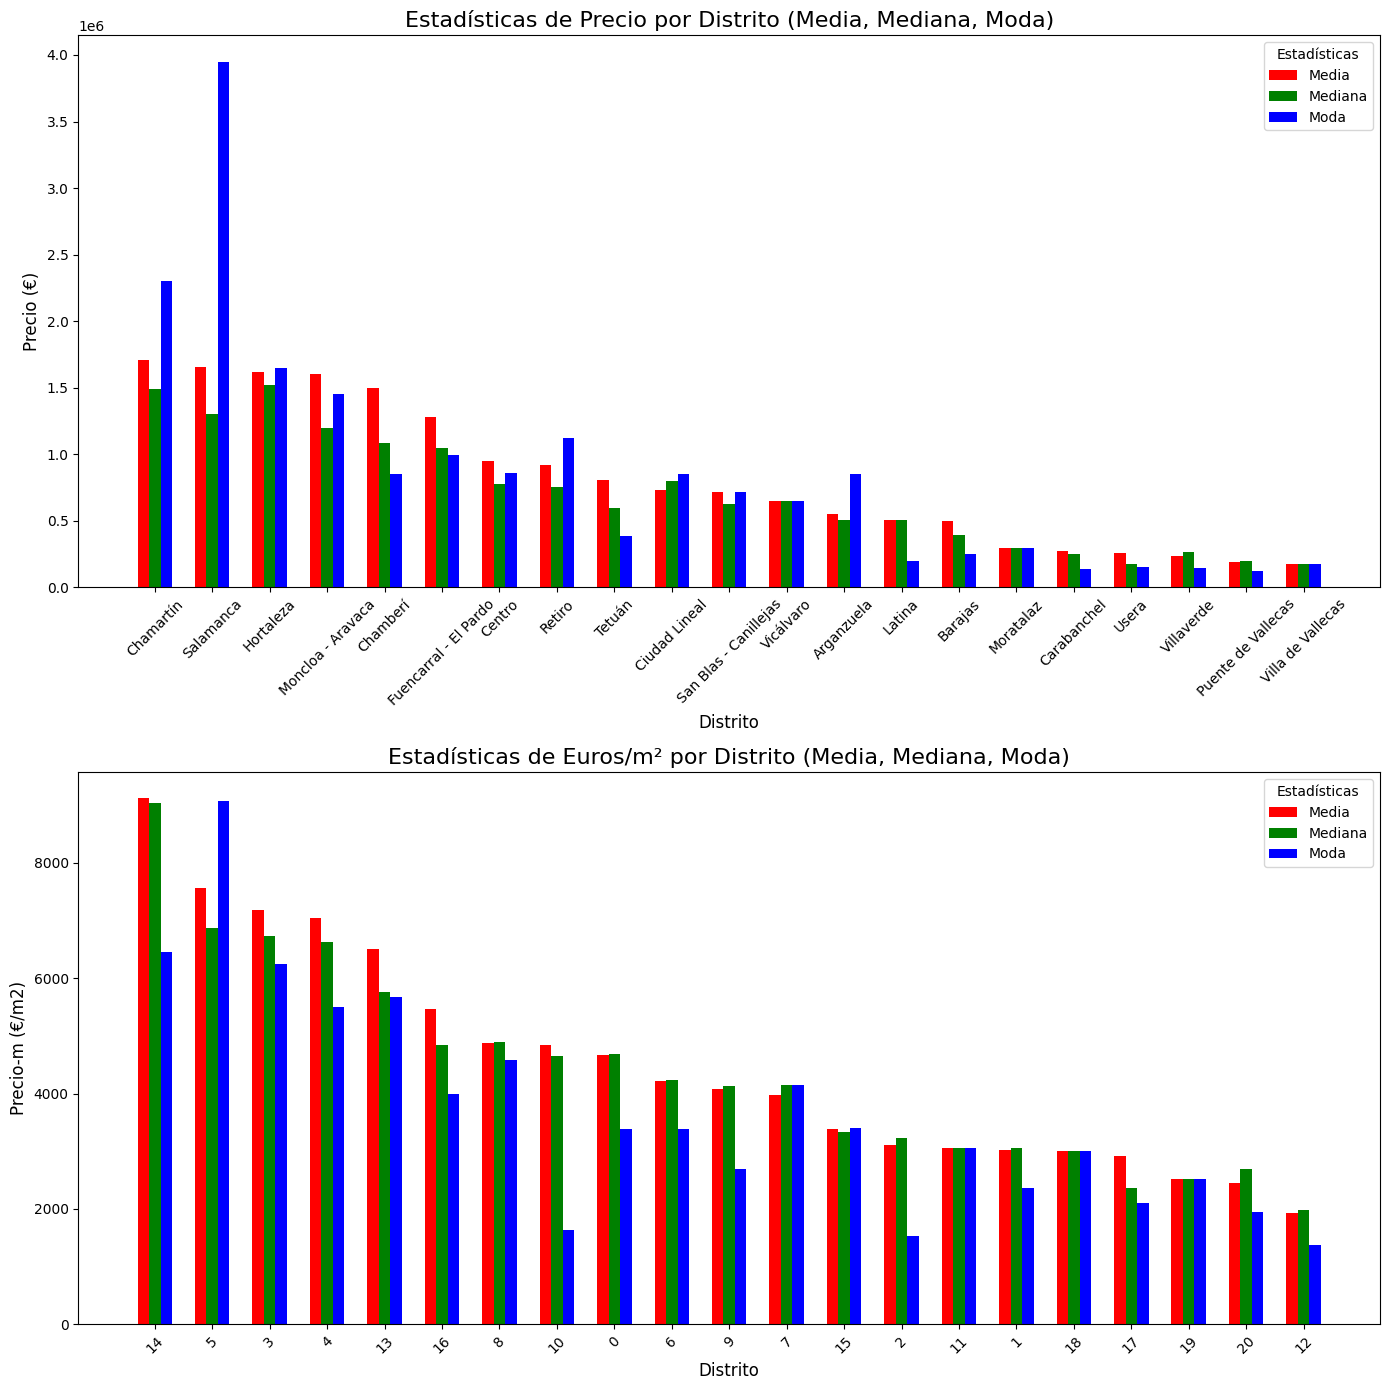

In [76]:
# Configuración del tamaño de la figura para dos gráficos
plt.figure(figsize=(14, 14))

# Gráfico 1: Precio por Distrito
plt.subplot(2, 1, 1)  # Subgráfico en la parte superior
x_pos = np.arange(len(distritos_precios))  # Posición de los distritos en el eje X

# Crear barras para media, mediana y moda
plt.bar(x_pos - 0.2, distritos_precios['media'], width=0.2, color='red', label='Media')
plt.bar(x_pos, distritos_precios['mediana'], width=0.2, color='green', label='Mediana')
plt.bar(x_pos + 0.2, distritos_precios['moda'], width=0.2, color='blue', label='Moda')

# Personalización del gráfico
plt.xticks(x_pos, distritos_precios.index, rotation=45)  # Mostrar distritos en el eje X
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Estadísticas de Precio por Distrito (Media, Mediana, Moda)', fontsize=16)
plt.legend(title='Estadísticas')
plt.tight_layout()

# Gráfico 2: Euros por m² por Distrito
plt.subplot(2, 1, 2)  # Subgráfico en la parte inferior
x_pos_m2 = np.arange(len(distritos_precios_m2))  # Posición de los distritos en el eje X

# Crear barras para media, mediana y moda
plt.bar(x_pos_m2 - 0.2, distritos_precios_m2['media_m2'], width=0.2, color='red', label='Media')
plt.bar(x_pos_m2, distritos_precios_m2['mediana_m2'], width=0.2, color='green', label='Mediana')
plt.bar(x_pos_m2 + 0.2, distritos_precios_m2['moda_m2'], width=0.2, color='blue', label='Moda')

# Personalización del gráfico
plt.xticks(x_pos_m2, distritos_precios_m2.index, rotation=45)  # Mostrar distritos en el eje X
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Precio-m (€/m2)', fontsize=12)
plt.title('Estadísticas de Euros/m² por Distrito (Media, Mediana, Moda)', fontsize=16)
plt.legend(title='Estadísticas')
plt.tight_layout()

plt.savefig('graf/precios_distritos.png', dpi=150) 


# Mostrar gráficos
plt.show()


_____________

Voy a ver si puedo tratar y ahondar en el conocimiento de los outliers de mi cuadro de datos.

#### outliers precio inmueble

In [89]:
# Calcular los cuartiles y el rango intercuartílico (IQR) para la columna 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Filtrar los outliers (valores fuera de 1.5 * IQR)
outliers_price = df[(df['price'] < (Q1_price - 1.5 * IQR_price)) | (df['price'] > (Q3_price + 1.5 * IQR_price))]


# Mostrar los outliers de 'price'
outliers_price


,url,title,euros_m2,price,baths,rooms,m2,description,type,Barrio,Distrito,adName
id,,,,,,,,,,,,
103363210,https://www.idealista.com/inmueble/103363210/,Piso en venta en calle del Príncipe de Vergara,18688.52,5700000,5,4,305,DIZA consultores les presenta vivienda de lujo...,Pisos,Recoletos,Salamanca,DIZA Consultores Inmobiliaria - Propiedades de...
103876000,https://www.idealista.com/inmueble/103876000/,Piso en venta en calle del Conde de Aranda,13573.88,3950000,5,4,291,DIZA consultores les presenta vivienda reforma...,Pisos,Recoletos,Salamanca,DIZA Consultores Inmobiliaria - Propiedades de...
104053005,https://www.idealista.com/inmueble/104053005/,Ático en venta en calle de Claudio Coello,13732.39,3900000,5,5,284,DIZA consultores les presenta ático a estrenar...,Pisos,Castellana,Salamanca,DIZA Consultores Inmobiliaria - Propiedades de...
104103711,https://www.idealista.com/inmueble/104103711/,Casa o chalet independiente en venta en calle ...,5586.91,4950000,7,6,886,PROMORA MADRID vende magnífico chalet independ...,Independientes,Nueva España,Chamartín,Promora Madrid
101980713,https://www.idealista.com/inmueble/101980713/,Piso en venta en calle de José Ortega y Gasset,16701.90,7900000,5,4,473,PROMORA MADRID vende espectacular piso muy exc...,Pisos,Castellana,Salamanca,Promora Madrid
102729947,https://www.idealista.com/inmueble/102729947/,Casa o chalet independiente en venta en Conde ...,4782.61,5500000,6,7,1150,Fantástica casa en Conde OrgazEn el Parque Con...,Independientes,ND,Hortaleza,Engel & Völkers Madrid
28839965,https://www.idealista.com/inmueble/28839965/,Casa o chalet independiente en venta en El Pla...,2295.08,3500000,6,5,1525,"1º LÍNEA de EL PARDO, LINDANDO con la RESERVA ...",Independientes,ND,Moncloa - Aravaca,Jaime Valcarce Consulting Inmobiliario
91869388,https://www.idealista.com/inmueble/91869388/,Casa o chalet independiente en venta en calle ...,4930.56,3550000,9,8,720,David Salcedo de GV | PUERTA DE HIERRO comerci...,Independientes,Ciudad Universitaria,Moncloa - Aravaca,GV | Real Estate
100146519,https://www.idealista.com/inmueble/100146519/,Chalet adosado en venta en El Viso,7804.88,3200000,5,7,410,PROMORA MADRID vende chalet adosado para refor...,Independientes,ND,Chamartín,Promora Madrid


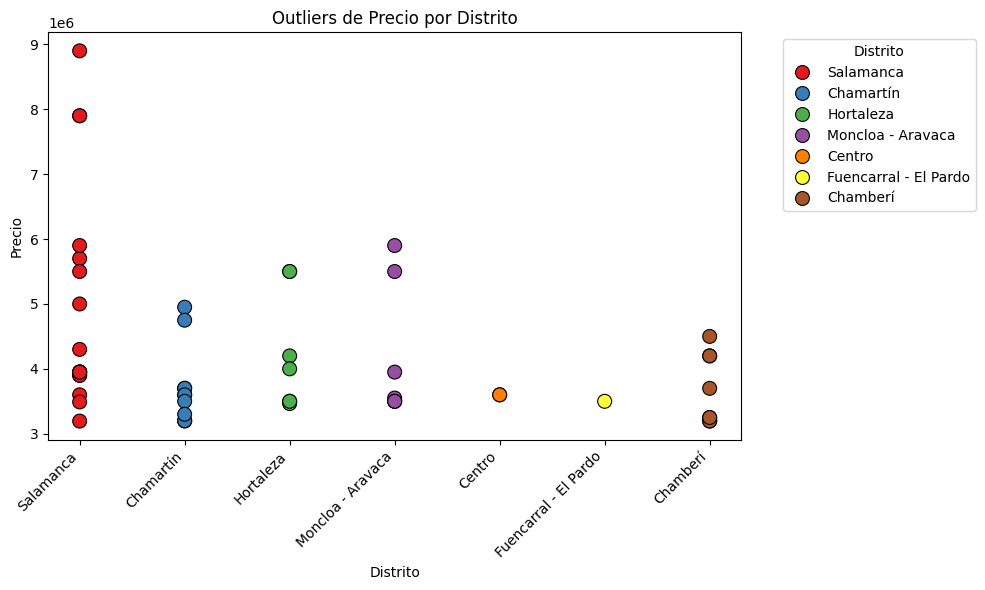

In [84]:

# Crear el gráfico de dispersión para mostrar los outliers en los distritos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=outliers_price, x='Distrito', y='price', hue='Distrito', palette='Set1', s=100, edgecolor='black')
plt.title('Outliers de Precio por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los distritos si es necesario
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


Se observa una concentración de los outliers en solo 7 distritos de los 21 de Madrid. 

#### outliers precio/m2

In [92]:
# Calcular los cuartiles y el rango intercuartílico (IQR) para la columna 'euros_m2'
Q1_price = df['euros_m2'].quantile(0.25)
Q3_price = df['euros_m2'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Filtrar los outliers (valores fuera de 1.5 * IQR)
outliers_price_m2 = df[(df['euros_m2'] < (Q1_price - 1.5 * IQR_price)) | (df['euros_m2'] > (Q3_price + 1.5 * IQR_price))]


# Mostrar los outliers de 'euros_m2'
outliers_price_m2


,url,title,euros_m2,price,baths,rooms,m2,description,type,Barrio,Distrito,adName
id,,,,,,,,,,,,
103989666,https://www.idealista.com/inmueble/103989666/,Piso en venta en calle de Claudio Coello,13713.36,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,Pisos,Recoletos,Salamanca,Walter Haus Madrid
103363210,https://www.idealista.com/inmueble/103363210/,Piso en venta en calle del Príncipe de Vergara,18688.52,5700000,5,4,305,DIZA consultores les presenta vivienda de lujo...,Pisos,Recoletos,Salamanca,DIZA Consultores Inmobiliaria - Propiedades de...
103876000,https://www.idealista.com/inmueble/103876000/,Piso en venta en calle del Conde de Aranda,13573.88,3950000,5,4,291,DIZA consultores les presenta vivienda reforma...,Pisos,Recoletos,Salamanca,DIZA Consultores Inmobiliaria - Propiedades de...
104053005,https://www.idealista.com/inmueble/104053005/,Ático en venta en calle de Claudio Coello,13732.39,3900000,5,5,284,DIZA consultores les presenta ático a estrenar...,Pisos,Castellana,Salamanca,DIZA Consultores Inmobiliaria - Propiedades de...
101980713,https://www.idealista.com/inmueble/101980713/,Piso en venta en calle de José Ortega y Gasset,16701.90,7900000,5,4,473,PROMORA MADRID vende espectacular piso muy exc...,Pisos,Castellana,Salamanca,Promora Madrid
103259725,https://www.idealista.com/inmueble/103259725/,Piso en venta en paseo de la castellana,13930.35,2800000,3,4,201,Piso en venta en el prestigioso barrio de Alma...,Pisos,Almagro,Chamberí,Gilmar Chamberi - Argüelles
102881787,https://www.idealista.com/inmueble/102881787/,Piso en venta en via Gran,13271.03,1420000,2,2,107,Gilmar Consulting Inmobiliario presenta para s...,Pisos,Universidad,Centro,Gilmar Centro
104182500,https://www.idealista.com/inmueble/104182500/,Piso en venta en calle de San Marcos,13684.21,780000,2,2,57,HUSPY tiene el placer de presentar este exclus...,Pisos,Justicia,Centro,Huspy
103869856,https://www.idealista.com/inmueble/103869856/,Piso en venta en calle Libertad,14214.29,199000,1,1,14,¡Bienvenidos al corazón de Chueca! Si estás bu...,Pisos,Justicia,Centro,Sky Real Estate - Madrid


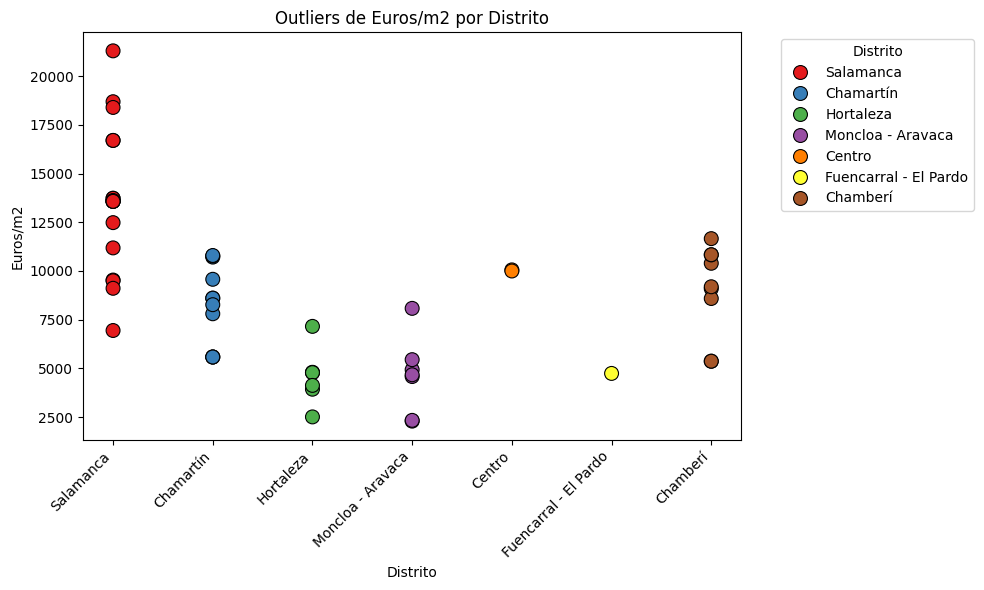

In [93]:

# Crear el gráfico de dispersión para mostrar los outliers de precio_m2 en los distritos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=outliers_price, x='Distrito', y='euros_m2', hue='Distrito', palette='Set1', s=100, edgecolor='black')
plt.title('Outliers de Euros/m2 por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Euros/m2')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los distritos si es necesario
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()
